In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import root

In [9]:
stock_data = yf.download('VTSMX', start='2012-12-01', end='2022-12-31')
monthly_data = stock_data.resample('M').last()
monthly_returns = monthly_data['Adj Close'].pct_change()
m_return = pd.DataFrame(index = monthly_returns.index,columns = \
                        ['VTSMX','FCNTX','AIVSX','PONAX','TRBCX','DODGX','MDLOX','FKGRX','OLGAX','PRNHX'])
m_return['VTSMX'] = monthly_returns
for stock_code in ['FCNTX','AIVSX','PONAX','TRBCX','DODGX','MDLOX','FKGRX','OLGAX','PRNHX']:
    stock_data = yf.download(stock_code, start='2012-12-01', end='2022-12-31')
    monthly_data = stock_data.resample('M').last()
    monthly_returns = monthly_data['Adj Close'].pct_change()
    m_return[stock_code] = monthly_returns

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
m_return = m_return.iloc[1:]

In [14]:
m_return

,VTSMX,FCNTX,AIVSX,PONAX,TRBCX,DODGX,MDLOX,FKGRX,OLGAX,PRNHX
Date,,,,,,,,,,
2013-01-31,0.054995,0.039061,0.041777,0.018947,0.044269,0.061526,0.027355,0.037740,0.042119,0.069943
2013-02-28,0.012766,0.013369,0.011139,0.004965,0.010703,0.007265,-0.001479,0.009711,-0.005602,0.019442
2013-03-31,0.038789,0.036946,0.037203,0.003367,0.024709,0.045086,0.016297,0.030360,0.025754,0.039801
2013-04-30,0.017009,0.018231,0.032907,0.020119,0.013779,0.019316,0.021866,0.008419,0.019223,0.011696
2013-05-31,0.023215,0.019778,0.011210,-0.001642,0.038777,0.031390,-0.001902,0.025227,0.027714,0.040988
...,...,...,...,...,...,...,...,...,...,...
2022-08-31,-0.037461,-0.039972,-0.027854,-0.011743,-0.054609,-0.024777,-0.029720,-0.050269,-0.034724,0.002064
2022-09-30,-0.092852,-0.081838,-0.087327,-0.038103,-0.104747,-0.095159,-0.068468,-0.094260,-0.075777,-0.098315
2022-10-31,0.081558,0.046912,0.079167,0.002148,0.023544,0.114320,0.032237,0.071340,0.060801,0.059813


In [17]:
in_return = m_return.iloc[:60]
out_return = m_return.iloc[60:]

In [15]:
def kink_1(x):
    if x >= -0.01:
        return np.log(1+x)
    else:
        return np.log(1+x) + 10*(x+0.01)

In [16]:
def kink1_utility(params,start_index,end_index):
    if len(params) == 9:
        w = list(params)
        w.append(1-sum(w))
    else:
        w = list(params)
    result = 0
    for i in range(start_index,end_index):
        now_return = np.dot(np.array(w),np.array(m_return.iloc[i]).reshape(10,1))[0]
        result += kink_1(now_return)
    return result/60

In [17]:
initial_guess = [0.1] * 9  
result = minimize(lambda params: -kink1_utility(params,0,30), initial_guess, method='SLSQP', bounds=[(-1, 1)] * 9)

In [18]:
result.x

array([-0.26031455, -0.63034123,  0.55819503,  0.46490088,  0.98550096,
        0.07531354, -1.        ,  1.        , -0.42438886])

In [19]:
result.fun

-0.009181292079344743

In [20]:
def kink_5(x):
    if x >= -0.05:
        return np.log(1+x)
    else:
        return np.log(1+x) + 10*(x+0.01)
def kink5_utility(params,start_index,end_index):
    if len(params) == 9:
        w = list(params)
        w.append(1-sum(w))
    else:
        w = list(params)
    result = 0
    for i in range(start_index,end_index):
        now_return = np.dot(np.array(w),np.array(m_return.iloc[i]).reshape(10,1))[0]
        result += kink_5(now_return)
    return result/60

In [21]:
def S_0(x):
    if x > 0:
        return 2.25*((x - 0)**0.01)
    else:
        return -2.25*((0 - x)**0.01)
def s0_utility(params,start_index,end_index):
    if len(params) == 9:
        w = list(params)
        w.append(1-sum(w))
    else:
        w = list(params)
    result = 0
    for i in range(start_index,end_index):
        now_return = np.dot(np.array(w),np.array(m_return.iloc[i]).reshape(10,1))[0]
        result += S_0(now_return)
    return result/60

In [39]:
def S_5(x):
    if x > 0.005:
        return 2.25*((x - 0.005)**0.01)
    else:
        return -2.25*((0.005 - x)**0.01)
def s5_utility(params,start_index,end_index):
    if len(params) == 9:
        w = list(params)
        w.append(1-sum(w))
    else:
        w = list(params)
    result = 0
    for i in range(start_index,end_index):
        now_return = np.dot(np.array(w),np.array(m_return.iloc[i]).reshape(10,1))[0]
        result += S_5(now_return)
    return result/60

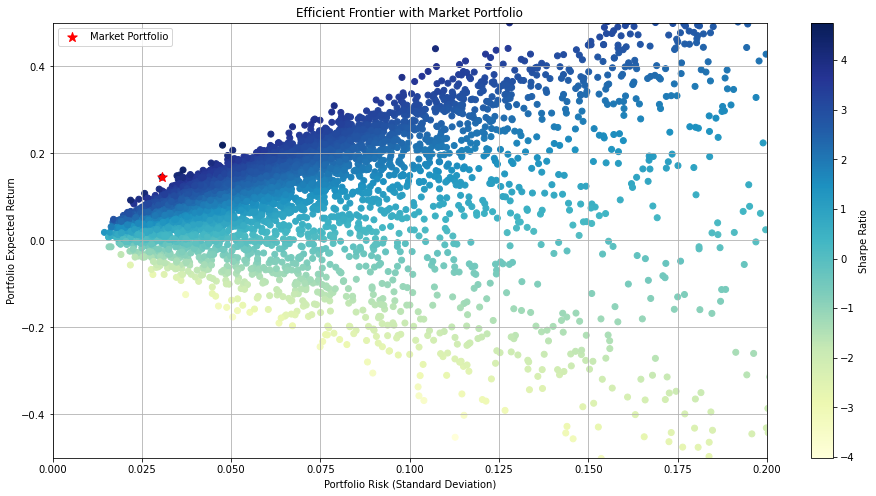

In [118]:
r = 0
expected_returns = np.array(np.mean(m_return))*12
cov_matrix = np.cov(m_return.T)

# Monte Carlo simulation to generate portfolio return, risk, and weights
risk = []  
returns = []
sharpe_ratio = []

for _ in range(10000):
    weights = np.random.uniform(-1, 1, size=len(expected_returns))
    weights /= np.sum(weights)
    port_return = np.dot(weights, expected_returns)
    port_risk = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    risk.append(port_risk)
    returns.append(port_return)
    sharpe_ratio.append((port_return - r) / port_risk)

# market portfolio
market_risk = risk[np.argmax(sharpe_ratio)]
market_return = returns[np.argmax(sharpe_ratio)]
market_sharpe = max(sharpe_ratio)

# efficient frontier
plt.figure(figsize = (16,8))
plt.scatter(risk, returns, c=sharpe_ratio, cmap='YlGnBu', marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Portfolio Risk (Standard Deviation)')
plt.ylabel('Portfolio Expected Return')
plt.title('Efficient Frontier with Market Portfolio')
plt.scatter(market_risk, market_return, c='red', marker='*', s=100, label='Market Portfolio')
plt.legend()
plt.ylim(-0.5,0.5)
plt.xlim(0,0.2)
plt.grid(True)
plt.show()

In [29]:
def MV_cal(target_miu,start_index,end_index):
    expected_returns = np.array(np.mean(m_return.iloc[start_index:end_index]))*12
    cov_matrix = np.cov(m_return.iloc[start_index:end_index].T)
    cov_inverse = np.linalg.inv(cov_matrix)
    vec_1 = np.array([1,1,1,1,1,1,1,1,1,1])
    U = -0.5*np.dot(expected_returns,np.dot(cov_inverse,expected_returns.reshape(10,1)))[0]
    V = -0.5*np.dot(expected_returns,np.dot(cov_inverse,vec_1.reshape(10,1)))[0]
    W = -0.5*np.dot(vec_1,np.dot(cov_inverse,vec_1.reshape(10,1)))[0]
    D = U*W - V*V
    lamda = (target_miu*W - V)/D
    phi = -(target_miu*V - U)/D
    w_result = -0.5*np.dot(cov_inverse,(lamda*expected_returns + phi*vec_1))
    return w_result

In [65]:
for i in range(3):
    in_sample_result = pd.DataFrame(index = ['Expected return','std','Expected utility','weights'],\
                                    columns = ['Kink 1% FS','Kink 1% MV','Kink 5% FS','Kink 5% MV',\
                                               'S_shape 0% FS','S_shape 0% MV','S_shape 0.5% FS','S_shape 0.5% MV'])
    initial_guess = [0.1] * 9  
    result = minimize(lambda params: -kink1_utility(params,i*30,i*30+30), initial_guess, method='SLSQP')
    weights = list(result.x)
    weights.append(1 - sum(result.x))
    weights = np.array(weights)
    in_sample_result['Kink 1% FS'].loc['weights'] = weights
    in_sample_result['Kink 1% FS'].loc['Expected return'] = -12*result.fun
    in_sample_result['Kink 1% FS'].loc['std'] = np.sqrt(np.dot(weights.T, np.dot(np.cov(m_return.iloc[i*30:i*30+30].T), weights)))
    in_sample_result['Kink 1% FS'].loc['Expected utility'] = kink1_utility(weights,i*30,i*30+30)
    in_sample_result['Kink 1% MV'].loc['Expected return'] = -12*result.fun
    weights_MV = MV_cal(-12*result.fun,i*30,i*30+30)
    in_sample_result['Kink 1% MV'].loc['weights'] = weights_MV
    in_sample_result['Kink 1% MV'].loc['std'] = np.sqrt(np.dot(weights_MV.T, np.dot(np.cov(m_return.iloc[i*30:i*30+30].T), weights_MV)))
    in_sample_result['Kink 1% MV'].loc['Expected utility'] = kink1_utility(weights_MV,i*30,i*30+30)
    initial_guess = [0.1] * 9  
    result = minimize(lambda params: -kink5_utility(params,i*30,i*30+30), initial_guess, method='SLSQP')
    weights = list(result.x)
    weights.append(1 - sum(result.x))
    weights = np.array(weights)
    in_sample_result['Kink 5% FS'].loc['weights'] = weights
    in_sample_result['Kink 5% FS'].loc['Expected return'] = -12*result.fun
    in_sample_result['Kink 5% FS'].loc['std'] = np.sqrt(np.dot(weights.T, np.dot(np.cov(m_return.iloc[i*30:i*30+30].T), weights)))
    in_sample_result['Kink 5% FS'].loc['Expected utility'] = kink5_utility(weights,i*30,i*30+30)
    in_sample_result['Kink 5% MV'].loc['Expected return'] = -12*result.fun
    weights_MV = MV_cal(-12*result.fun,i*30,i*30+30)
    in_sample_result['Kink 5% MV'].loc['weights'] = weights_MV
    in_sample_result['Kink 5% MV'].loc['std'] = np.sqrt(np.dot(weights_MV.T, np.dot(np.cov(m_return.iloc[i*30:i*30+30].T), weights_MV)))
    in_sample_result['Kink 5% MV'].loc['Expected utility'] = kink5_utility(weights_MV,i*30,i*30+30)
    initial_guess = [0.1] * 9  
    result = minimize(lambda params: -s0_utility(params,i*30,i*30+30), initial_guess, method='SLSQP')
    weights = list(result.x)
    weights.append(1 - sum(result.x))
    weights = np.array(weights)
    in_sample_result['S_shape 0% FS'].loc['weights'] = weights
    in_sample_result['S_shape 0% FS'].loc['Expected return'] = -12*result.fun
    in_sample_result['S_shape 0% FS'].loc['std'] = np.sqrt(np.dot(weights.T, np.dot(np.cov(m_return.iloc[i*30:i*30+30].T), weights)))
    in_sample_result['S_shape 0% FS'].loc['Expected utility'] = s0_utility(weights,i*30,i*30+30)
    in_sample_result['S_shape 0% MV'].loc['Expected return'] = -12*result.fun
    weights_MV = MV_cal(-12*result.fun,i*30,i*30+30)
    in_sample_result['S_shape 0% MV'].loc['weights'] = weights_MV
    in_sample_result['S_shape 0% MV'].loc['std'] = np.sqrt(np.dot(weights_MV.T, np.dot(np.cov(m_return.iloc[i*30:i*30+30].T), weights_MV)))
    in_sample_result['S_shape 0% MV'].loc['Expected utility'] = s0_utility(weights_MV,i*30,i*30+30)
    initial_guess = [0.1] * 9  
    result = minimize(lambda params: -s5_utility(params,i*30,i*30+30), initial_guess, method='SLSQP')
    weights = list(result.x)
    weights.append(1 - sum(result.x))
    weights = np.array(weights)
    in_sample_result['S_shape 0.5% FS'].loc['weights'] = weights
    in_sample_result['S_shape 0.5% FS'].loc['Expected return'] = -12*result.fun
    in_sample_result['S_shape 0.5% FS'].loc['std'] = np.sqrt(np.dot(weights.T, np.dot(np.cov(m_return.iloc[i*30:i*30+30].T), weights)))
    in_sample_result['S_shape 0.5% FS'].loc['Expected utility'] = s5_utility(weights,i*30,i*30+30)
    in_sample_result['S_shape 0.5% MV'].loc['Expected return'] = -12*result.fun
    weights_MV = MV_cal(-12*result.fun,i*30,i*30+30)
    in_sample_result['S_shape 0.5% MV'].loc['weights'] = weights_MV
    in_sample_result['S_shape 0.5% MV'].loc['std'] = np.sqrt(np.dot(weights_MV.T, np.dot(np.cov(m_return.iloc[i*30:i*30+30].T), weights_MV)))
    in_sample_result['S_shape 0.5% MV'].loc['Expected utility'] = s5_utility(weights_MV,i*30,i*30+30)
    print("In Sample")
    display(in_sample_result)
    out_sample_result = pd.DataFrame(index = ['Expected return','std','Sharpe ratio','Expected utility','weights'],\
                                    columns = ['Kink 1% FS','Kink 1% MV','Kink 5% FS','Kink 5% MV',\
                                               'S_shape 0% FS','S_shape 0% MV','S_shape 0.5% FS','S_shape 0.5% MV'])
    expected_returns = np.array(np.mean(m_return.iloc[i*30+30:i*30+60]))*12
    for a in ['Kink 1% FS','Kink 1% MV']:
        weights = in_sample_result[a].loc['weights']
        out_sample_result[a].loc['weights'] = weights
        out_sample_result[a].loc['Expected return'] = np.dot(weights, expected_returns)
        out_sample_result[a].loc['std'] = np.sqrt(np.dot(weights.T, np.dot(np.cov(m_return.iloc[i*30+30:i*30+60].T), weights)))
        out_sample_result[a].loc['Sharpe ratio'] = out_sample_result[a].loc['Expected return']/out_sample_result[a].loc['std']
        out_sample_result[a].loc['Expected utility'] = kink1_utility(weights,i*30+30,i*30+60)
    for a in ['Kink 5% FS','Kink 5% MV']:
        weights = in_sample_result[a].loc['weights']
        out_sample_result[a].loc['weights'] = weights
        out_sample_result[a].loc['Expected return'] = np.dot(weights, expected_returns)
        out_sample_result[a].loc['std'] = np.sqrt(np.dot(weights.T, np.dot(np.cov(m_return.iloc[i*30+30:i*30+60].T), weights)))
        out_sample_result[a].loc['Sharpe ratio'] = out_sample_result[a].loc['Expected return']/out_sample_result[a].loc['std']
        out_sample_result[a].loc['Expected utility'] = kink5_utility(weights,i*30+30,i*30+60)
    for a in ['S_shape 0% FS','S_shape 0% MV']:
        weights = in_sample_result[a].loc['weights']
        out_sample_result[a].loc['weights'] = weights
        out_sample_result[a].loc['Expected return'] = np.dot(weights, expected_returns)
        out_sample_result[a].loc['std'] = np.sqrt(np.dot(weights.T, np.dot(np.cov(m_return.iloc[i*30+30:i*30+60].T), weights)))
        out_sample_result[a].loc['Sharpe ratio'] = out_sample_result[a].loc['Expected return']/out_sample_result[a].loc['std']
        out_sample_result[a].loc['Expected utility'] = s0_utility(weights,i*30+30,i*30+60)
    for a in ['S_shape 0.5% FS','S_shape 0.5% MV']:
        weights = in_sample_result[a].loc['weights']
        out_sample_result[a].loc['weights'] = weights
        out_sample_result[a].loc['Expected return'] = np.dot(weights, expected_returns)
        out_sample_result[a].loc['std'] = np.sqrt(np.dot(weights.T, np.dot(np.cov(m_return.iloc[i*30+30:i*30+60].T), weights)))
        out_sample_result[a].loc['Sharpe ratio'] = out_sample_result[a].loc['Expected return']/out_sample_result[a].loc['std']
        out_sample_result[a].loc['Expected utility'] = s5_utility(weights,i*30+30,i*30+60)
    print("Out sample")
    display(out_sample_result)

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In Sample


,Kink 1% FS,Kink 1% MV,Kink 5% FS,Kink 5% MV,S_shape 0% FS,S_shape 0% MV,S_shape 0.5% FS,S_shape 0.5% MV
Expected return,0.039483,0.039483,0.110539,0.110539,9.046993,9.046993,6.096586,6.096586
std,0.019136,0.008516,0.034713,0.010392,131662.438329,0.803972,265276.686195,0.540544
Expected utility,0.00329,-0.000696,0.009212,0.004559,0.753916,0.750349,0.508049,0.747179
weights,"[-0.019097390548505334, 0.09072926009594742, 0...","[-0.5736159791855258, -0.046551922962502434, -...","[0.04773843783182385, 0.05261866410625663, 0.0...","[-1.4993069492726239, -0.0850865904964957, 0.2...","[-1815012.8254024405, 1314281.2775530727, 2941...","[-117.92019084231288, -4.931455627033273, 84.4...","[1421422.038685925, -2034507.1578618186, 43213...","[-79.48335929427537, -3.3314070442710317, 56.6..."


Out sample


/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,Kink 1% FS,Kink 1% MV,Kink 5% FS,Kink 5% MV,S_shape 0% FS,S_shape 0% MV,S_shape 0.5% FS,S_shape 0.5% MV
Expected return,0.107074,0.042198,0.146809,0.099588,572786.235904,7.317344,813851.011411,4.934372
std,0.021817,0.008632,0.037698,0.01566,140499.766565,1.338726,331724.753384,0.901174
Sharpe ratio,4.907771,4.888591,3.894334,6.359494,4.076777,5.465902,2.453392,5.475493
Expected utility,-0.010573,0.001284,-0.017516,0.004074,0.339938,0.301536,0.253924,0.29981
weights,"[-0.019097390548505334, 0.09072926009594742, 0...","[-0.5736159791855258, -0.046551922962502434, -...","[0.04773843783182385, 0.05261866410625663, 0.0...","[-1.4993069492726239, -0.0850865904964957, 0.2...","[-1815012.8254024405, 1314281.2775530727, 2941...","[-117.92019084231288, -4.931455627033273, 84.4...","[1421422.038685925, -2034507.1578618186, 43213...","[-79.48335929427537, -3.3314070442710317, 56.6..."


/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In Sample


,Kink 1% FS,Kink 1% MV,Kink 5% FS,Kink 5% MV,S_shape 0% FS,S_shape 0% MV,S_shape 0.5% FS,S_shape 0.5% MV
Expected return,0.039199,0.039199,0.053427,0.053427,7.803589,7.803589,7.805993,7.805993
std,0.010183,0.00522,0.024509,0.004811,19549.278427,0.7742,15423.161831,0.77444
Expected utility,0.003267,0.001624,0.004452,0.002216,0.650299,0.820072,0.650499,0.819837
weights,"[0.08816631344898164, 0.059261186172444746, -0...","[0.1727871440912938, -0.36944970302905933, -0....","[0.11565466251024327, 0.11992172803695329, 0.1...","[0.13415705405820455, -0.31514687303801175, -0...","[-77532.41240356116, -70404.78469260615, -8669...","[-20.908661551790942, 29.26502237603924, 43.24...","[-93507.42299447604, -54418.87252142189, -6793...","[-20.915189430869788, 29.274198702253102, 43.2..."


Out sample


/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,Kink 1% FS,Kink 1% MV,Kink 5% FS,Kink 5% MV,S_shape 0% FS,S_shape 0% MV,S_shape 0.5% FS,S_shape 0.5% MV
Expected return,0.024341,0.001563,0.08627,0.010827,179289.566352,5.057087,141298.831927,5.058653
std,0.018946,0.017535,0.045335,0.017292,33562.074349,1.042894,26419.251982,1.043217
Sharpe ratio,1.284744,0.08916,1.902945,0.626162,5.342029,4.849092,5.348328,4.849087
Expected utility,-0.013362,-0.013428,-0.040417,-0.010852,0.494266,0.302059,0.415632,0.301882
weights,"[0.08816631344898164, 0.059261186172444746, -0...","[0.1727871440912938, -0.36944970302905933, -0....","[0.11565466251024327, 0.11992172803695329, 0.1...","[0.13415705405820455, -0.31514687303801175, -0...","[-77532.41240356116, -70404.78469260615, -8669...","[-20.908661551790942, 29.26502237603924, 43.24...","[-93507.42299447604, -54418.87252142189, -6793...","[-20.915189430869788, 29.274198702253102, 43.2..."


/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In Sample


,Kink 1% FS,Kink 1% MV,Kink 5% FS,Kink 5% MV,S_shape 0% FS,S_shape 0% MV,S_shape 0.5% FS,S_shape 0.5% MV
Expected return,0.017875,0.017875,0.067665,0.067665,6.966777,6.966777,6.923192,6.923192
std,0.013906,0.011124,0.025378,0.010796,99256.16478,0.803324,41948.540118,0.798264
Expected utility,0.00149,-0.003988,0.005639,0.002784,0.580565,0.673407,0.576933,0.673234
weights,"[-0.1022358020187709, 0.03624535229088895, 0.0...","[0.3254674133440174, -0.00788948878976825, 0.2...","[-0.12974981477890024, 0.07429456067677903, -0...","[0.7097085989518366, -0.3965927663465134, 0.30...","[846058.0368930764, -260913.55901742133, 40940...","[53.951851408196944, -54.2570225934104, 1.9571...","[66168.05228648298, -12816.25410320672, 111024...","[53.61549429699642, -53.916759455437955, 1.946..."


Out sample


/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,Kink 1% FS,Kink 1% MV,Kink 5% FS,Kink 5% MV,S_shape 0% FS,S_shape 0% MV,S_shape 0.5% FS,S_shape 0.5% MV
Expected return,-0.091978,-0.066153,-0.075922,-0.114578,149282.029253,-6.824593,22815.749614,-6.782202
std,0.026384,0.024013,0.034561,0.034978,96641.108685,2.124234,42737.052137,2.110998
Sharpe ratio,-3.486146,-2.754916,-2.19674,-3.275684,1.544705,-3.212731,0.533863,-3.212794
Expected utility,-0.050134,-0.041554,-0.026976,-0.038069,0.085577,-0.08131,-0.161777,-0.08146
weights,"[-0.1022358020187709, 0.03624535229088895, 0.0...","[0.3254674133440174, -0.00788948878976825, 0.2...","[-0.12974981477890024, 0.07429456067677903, -0...","[0.7097085989518366, -0.3965927663465134, 0.30...","[846058.0368930764, -260913.55901742133, 40940...","[53.951851408196944, -54.2570225934104, 1.9571...","[66168.05228648298, -12816.25410320672, 111024...","[53.61549429699642, -53.916759455437955, 1.946..."


In [24]:
in_sample_result = pd.DataFrame(index = ['Expected return','std','Expected utility','weights'],\
                                columns = ['Kink 1% FS','Kink 1% MV','Kink 5% FS','Kink 5% MV',\
                                           'S_shape 0% FS','S_shape 0% MV','S_shape 0.5% FS','S_shape 0.5% MV'])

In [27]:
initial_guess = [0.1] * 9  
result = minimize(lambda params: -kink1_utility(params,0,30), initial_guess, method='SLSQP')
weights = list(result.x)
weights.append(1 - sum(result.x))
weights = np.array(weights)
in_sample_result['Kink 1% FS'].loc['weights'] = weights
in_sample_result['Kink 1% FS'].loc['Expected return'] = -12*result.fun
in_sample_result['Kink 1% FS'].loc['std'] = np.sqrt(np.dot(weights.T, np.dot(np.cov(m_return.iloc[0:30].T), weights)))
in_sample_result['Kink 1% FS'].loc['Expected utility'] = kink1_utility(weights,0,30)

In [30]:
in_sample_result['Kink 1% MV'].loc['Expected return'] = -12*result.fun
weights_MV = MV_cal(-12*result.fun,0,30)
in_sample_result['Kink 1% MV'].loc['weights'] = weights_MV
in_sample_result['Kink 1% MV'].loc['std'] = np.sqrt(np.dot(weights_MV.T, np.dot(np.cov(m_return.iloc[0:30].T), weights_MV)))
in_sample_result['Kink 1% MV'].loc['Expected utility'] = kink1_utility(weights_MV,0,30)

In [32]:
initial_guess = [0.1] * 9  
result = minimize(lambda params: -kink5_utility(params,0,30), initial_guess, method='SLSQP')
weights = list(result.x)
weights.append(1 - sum(result.x))
weights = np.array(weights)
in_sample_result['Kink 5% FS'].loc['weights'] = weights
in_sample_result['Kink 5% FS'].loc['Expected return'] = -12*result.fun
in_sample_result['Kink 5% FS'].loc['std'] = np.sqrt(np.dot(weights.T, np.dot(np.cov(m_return.iloc[0:30].T), weights)))
in_sample_result['Kink 5% FS'].loc['Expected utility'] = kink5_utility(weights,0,30)
in_sample_result['Kink 5% MV'].loc['Expected return'] = -12*result.fun
weights_MV = MV_cal(-12*result.fun,0,30)
in_sample_result['Kink 5% MV'].loc['weights'] = weights_MV
in_sample_result['Kink 5% MV'].loc['std'] = np.sqrt(np.dot(weights_MV.T, np.dot(np.cov(m_return.iloc[0:30].T), weights_MV)))
in_sample_result['Kink 5% MV'].loc['Expected utility'] = kink5_utility(weights_MV,0,30)

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [45]:
initial_guess = [0.1] * 9  
result = minimize(lambda params: -s0_utility(params,0,30), initial_guess, method='SLSQP')
weights = list(result.x)
weights.append(1 - sum(result.x))
weights = np.array(weights)
in_sample_result['S_shape 0% FS'].loc['weights'] = weights
in_sample_result['S_shape 0% FS'].loc['Expected return'] = -12*result.fun
in_sample_result['S_shape 0% FS'].loc['std'] = np.sqrt(np.dot(weights.T, np.dot(np.cov(m_return.iloc[0:30].T), weights)))
in_sample_result['S_shape 0% FS'].loc['Expected utility'] = s0_utility(weights,0,30)
in_sample_result['S_shape 0% MV'].loc['Expected return'] = -12*result.fun
weights_MV = MV_cal(-12*result.fun,0,30)
in_sample_result['S_shape 0% MV'].loc['weights'] = weights_MV
in_sample_result['S_shape 0% MV'].loc['std'] = np.sqrt(np.dot(weights_MV.T, np.dot(np.cov(m_return.iloc[0:30].T), weights_MV)))
in_sample_result['S_shape 0% MV'].loc['Expected utility'] = s0_utility(weights_MV,0,30)

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [47]:
initial_guess = [0.1] * 9  
result = minimize(lambda params: -s5_utility(params,0,30), initial_guess, method='SLSQP')
weights = list(result.x)
weights.append(1 - sum(result.x))
weights = np.array(weights)
in_sample_result['S_shape 0.5% FS'].loc['weights'] = weights
in_sample_result['S_shape 0.5% FS'].loc['Expected return'] = -12*result.fun
in_sample_result['S_shape 0.5% FS'].loc['std'] = np.sqrt(np.dot(weights.T, np.dot(np.cov(m_return.iloc[0:30].T), weights)))
in_sample_result['S_shape 0.5% FS'].loc['Expected utility'] = s5_utility(weights,0,30)
in_sample_result['S_shape 0.5% MV'].loc['Expected return'] = -12*result.fun
weights_MV = MV_cal(-12*result.fun,0,30)
in_sample_result['S_shape 0.5% MV'].loc['weights'] = weights_MV
in_sample_result['S_shape 0.5% MV'].loc['std'] = np.sqrt(np.dot(weights_MV.T, np.dot(np.cov(m_return.iloc[0:30].T), weights_MV)))
in_sample_result['S_shape 0.5% MV'].loc['Expected utility'] = s5_utility(weights_MV,0,30)

In [48]:
in_sample_result

,Kink 1% FS,Kink 1% MV,Kink 5% FS,Kink 5% MV,S_shape 0% FS,S_shape 0% MV,S_shape 0.5% FS,S_shape 0.5% MV
Expected return,0.039483,0.039483,0.110539,0.110539,9.046993,9.046993,6.096586,6.096586
std,0.019136,0.008516,0.034713,0.010392,131662.438329,0.803972,265276.686195,0.540544
Expected utility,0.00329,-0.000696,0.009212,0.004559,0.753916,0.750349,0.508049,0.747179
weights,"[-0.019097390548505334, 0.09072926009594742, 0...","[-0.5736159791855258, -0.046551922962502434, -...","[0.04773843783182385, 0.05261866410625663, 0.0...","[-1.4993069492726239, -0.0850865904964957, 0.2...","[-1815012.8254024405, 1314281.2775530727, 2941...","[-117.92019084231288, -4.931455627033273, 84.4...","[1421422.038685925, -2034507.1578618186, 43213...","[-79.48335929427537, -3.3314070442710317, 56.6..."


In [55]:
out_sample_result = pd.DataFrame(index = ['Expected return','std','Sharpe ratio','Expected utility','weights'],\
                                columns = ['Kink 1% FS','Kink 1% MV','Kink 5% FS','Kink 5% MV',\
                                           'S_shape 0% FS','S_shape 0% MV','S_shape 0.5% FS','S_shape 0.5% MV'])

In [56]:
expected_returns = np.array(np.mean(m_return.iloc[30:60]))*12
for a in ['Kink 1% FS','Kink 1% MV']:
    weights = in_sample_result[a].loc['weights']
    out_sample_result[a].loc['weights'] = weights
    out_sample_result[a].loc['Expected return'] = np.dot(weights, expected_returns)
    out_sample_result[a].loc['std'] = np.sqrt(np.dot(weights.T, np.dot(np.cov(m_return.iloc[30:60].T), weights)))
    out_sample_result[a].loc['Sharpe ratio'] = out_sample_result[a].loc['Expected return']/out_sample_result[a].loc['std']
    out_sample_result[a].loc['Expected utility'] = kink1_utility(weights,30,60)

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [57]:
expected_returns = np.array(np.mean(m_return.iloc[30:60]))*12
for a in ['Kink 5% FS','Kink 5% MV']:
    weights = in_sample_result[a].loc['weights']
    out_sample_result[a].loc['weights'] = weights
    out_sample_result[a].loc['Expected return'] = np.dot(weights, expected_returns)
    out_sample_result[a].loc['std'] = np.sqrt(np.dot(weights.T, np.dot(np.cov(m_return.iloc[30:60].T), weights)))
    out_sample_result[a].loc['Sharpe ratio'] = out_sample_result[a].loc['Expected return']/out_sample_result[a].loc['std']
    out_sample_result[a].loc['Expected utility'] = kink5_utility(weights,30,60)

In [58]:
expected_returns = np.array(np.mean(m_return.iloc[30:60]))*12
for a in ['S_shape 0% FS','S_shape 0% MV']:
    weights = in_sample_result[a].loc['weights']
    out_sample_result[a].loc['weights'] = weights
    out_sample_result[a].loc['Expected return'] = np.dot(weights, expected_returns)
    out_sample_result[a].loc['std'] = np.sqrt(np.dot(weights.T, np.dot(np.cov(m_return.iloc[30:60].T), weights)))
    out_sample_result[a].loc['Sharpe ratio'] = out_sample_result[a].loc['Expected return']/out_sample_result[a].loc['std']
    out_sample_result[a].loc['Expected utility'] = s0_utility(weights,30,60)
for a in ['S_shape 0.5% FS','S_shape 0.5% MV']:
    weights = in_sample_result[a].loc['weights']
    out_sample_result[a].loc['weights'] = weights
    out_sample_result[a].loc['Expected return'] = np.dot(weights, expected_returns)
    out_sample_result[a].loc['std'] = np.sqrt(np.dot(weights.T, np.dot(np.cov(m_return.iloc[30:60].T), weights)))
    out_sample_result[a].loc['Sharpe ratio'] = out_sample_result[a].loc['Expected return']/out_sample_result[a].loc['std']
    out_sample_result[a].loc['Expected utility'] = s5_utility(weights,30,60)

In [59]:
out_sample_result

,Kink 1% FS,Kink 1% MV,Kink 5% FS,Kink 5% MV,S_shape 0% FS,S_shape 0% MV,S_shape 0.5% FS,S_shape 0.5% MV
Expected return,0.107074,0.042198,0.146809,0.099588,572786.235904,7.317344,813851.011411,4.934372
std,0.021817,0.008632,0.037698,0.01566,140499.766565,1.338726,331724.753384,0.901174
Sharpe ratio,4.907771,4.888591,3.894334,6.359494,4.076777,5.465902,2.453392,5.475493
Expected utility,-0.010573,0.001284,-0.017516,0.004074,0.339938,0.301536,0.253924,0.29981
weights,"[-0.019097390548505334, 0.09072926009594742, 0...","[-0.5736159791855258, -0.046551922962502434, -...","[0.04773843783182385, 0.05261866410625663, 0.0...","[-1.4993069492726239, -0.0850865904964957, 0.2...","[-1815012.8254024405, 1314281.2775530727, 2941...","[-117.92019084231288, -4.931455627033273, 84.4...","[1421422.038685925, -2034507.1578618186, 43213...","[-79.48335929427537, -3.3314070442710317, 56.6..."


In [72]:
def RP_cal(alpha,start_index,end_index):
    w_list = []
    for code in m_return.columns:
        er = np.mean(m_return.iloc[start_index:end_index][code])
        sigma = np.std(m_return.iloc[start_index:end_index][code])
        w_list.append(((1+er)**alpha)/sigma)
    k = 1/(sum(w_list))
    w_array = np.array(w_list)
    w_array *= k
    return w_array

In [67]:
in_sample_rp = pd.DataFrame(index = ['Expected return','std','Sharpe ratio','weights'],\
                                columns = ['RP 0','MV 0','RP 10','MV 10','RP -10','MV -10'])

In [75]:
for i in range(3):
    in_sample_rp = pd.DataFrame(index = ['Expected return','std','Sharpe ratio','weights'],\
                                    columns = ['RP 0','MV 0','RP 10','MV 10','RP -10','MV -10'])
    expected_returns = np.array(np.mean(m_return.iloc[i*30:i*30+30]))*12
    for alpha in [0,10,-10]:
        weights = RP_cal(alpha,i*30,i*30+30)
        rp_column = 'RP ' + str(alpha)
        mv_column = 'MV ' + str(alpha)
        in_sample_rp[rp_column].loc['weights'] = weights
        in_sample_rp[rp_column].loc['Expected return'] = np.dot(weights, expected_returns)
        in_sample_rp[rp_column].loc['std'] = np.sqrt(np.dot(weights.T, np.dot(np.cov(m_return.iloc[i*30:i*30+30].T), weights)))
        in_sample_rp[rp_column].loc['Sharpe ratio'] = in_sample_rp[rp_column].loc['Expected return']/in_sample_rp[rp_column].loc['std']
        in_sample_rp[mv_column].loc['Expected return'] = in_sample_rp[rp_column].loc['Expected return']
        weights_MV = MV_cal(in_sample_rp[mv_column].loc['Expected return'],i*30,i*30+30)
        in_sample_rp[mv_column].loc['weights'] = weights_MV
        in_sample_rp[mv_column].loc['std'] = np.sqrt(np.dot(weights_MV.T, np.dot(np.cov(m_return.iloc[i*30:i*30+30].T), weights_MV)))
        in_sample_rp[mv_column].loc['Sharpe ratio'] = in_sample_rp[mv_column].loc['Expected return']/in_sample_rp[mv_column].loc['std']
    print("In Sample")
    display(in_sample_rp)
    out_sample_rp = pd.DataFrame(index = ['Expected return','std','Sharpe ratio','weights'],\
                                    columns = ['RP 0','MV 0','RP 10','MV 10','RP -10','MV -10'])
    expected_returns = np.array(np.mean(m_return.iloc[i*30+30:i*30+60]))*12
    for a in ['RP 0','MV 0','RP 10','MV 10','RP -10','MV -10']:
        weights = in_sample_rp[a].loc['weights']
        out_sample_rp[a].loc['weights'] = weights
        out_sample_rp[a].loc['Expected return'] = np.dot(weights, expected_returns)
        out_sample_rp[a].loc['std'] = np.sqrt(np.dot(weights.T, np.dot(np.cov(m_return.iloc[i*30+30:i*30+60].T), weights)))
        out_sample_rp[a].loc['Sharpe ratio'] = out_sample_rp[a].loc['Expected return']/out_sample_rp[a].loc['std']
    print("Out Sample")
    display(out_sample_rp)

In Sample


/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,RP 0,MV 0,RP 10,MV 10,RP -10,MV -10
Expected return,0.142538,0.142538,0.145474,0.145474,0.139529,0.139529
std,0.020429,0.012259,0.020817,0.012449,0.020034,0.012067
Sharpe ratio,6.977104,11.627608,6.988276,11.685935,6.964566,11.563247
weights,"[0.08537492359835545, 0.08603404964718249, 0.0...","[-1.9161794058053516, -0.10244015884237179, 0....","[0.0875559901830868, 0.08855272254237298, 0.09...","[-1.9544353260823133, -0.10403267644999392, 0....","[0.08304431815604874, 0.0833823142891439, 0.08...","[-1.8769796583794687, -0.10080835159428947, 0...."


Out Sample


/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,RP 0,MV 0,RP 10,MV 10,RP -10,MV -10
Expected return,0.106345,0.125433,0.108078,0.127805,0.104569,0.123003
std,0.023381,0.019866,0.023901,0.020263,0.022848,0.01946
Sharpe ratio,4.548339,6.314101,4.521881,6.307158,4.576798,6.320968
weights,"[0.08537492359835545, 0.08603404964718249, 0.0...","[-1.9161794058053516, -0.10244015884237179, 0....","[0.0875559901830868, 0.08855272254237298, 0.09...","[-1.9544353260823133, -0.10403267644999392, 0....","[0.08304431815604874, 0.0833823142891439, 0.08...","[-1.8769796583794687, -0.10080835159428947, 0...."


In Sample


/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,RP 0,MV 0,RP 10,MV 10,RP -10,MV -10
Expected return,0.098382,0.098382,0.09953,0.09953,0.097233,0.097233
std,0.020216,0.006066,0.020555,0.006138,0.019878,0.005996
Sharpe ratio,4.866509,16.217768,4.842048,16.214769,4.891548,16.217225
weights,"[0.0739154249495106, 0.07351783658344221, 0.07...","[0.01209669847817696, -0.14356501205784156, 0....","[0.07540981423551237, 0.07579440141514382, 0.0...","[0.008980739163409357, -0.13918486671559926, 0...","[0.07238187849153215, 0.0712419624882442, 0.07...","[0.015218360344240178, -0.14795317355208537, 0..."


Out Sample


/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,RP 0,MV 0,RP 10,MV 10,RP -10,MV -10
Expected return,0.085149,0.040098,0.086887,0.040846,0.083415,0.03935
std,0.037905,0.017901,0.038462,0.017943,0.037349,0.01786
Sharpe ratio,2.246363,2.240062,2.259021,2.276457,2.233387,2.203274
weights,"[0.0739154249495106, 0.07351783658344221, 0.07...","[0.01209669847817696, -0.14356501205784156, 0....","[0.07540981423551237, 0.07579440141514382, 0.0...","[0.008980739163409357, -0.13918486671559926, 0...","[0.07238187849153215, 0.0712419624882442, 0.07...","[0.015218360344240178, -0.14795317355208537, 0..."


In Sample


/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,RP 0,MV 0,RP 10,MV 10,RP -10,MV -10
Expected return,0.094282,0.094282,0.099172,0.099172,0.089611,0.089611
std,0.041483,0.011837,0.042325,0.012105,0.040671,0.011602
Sharpe ratio,2.272758,7.965018,2.343099,8.192941,2.2033,7.724053
weights,"[0.07908439715544142, 0.07867893151787567, 0.0...","[0.9151172479836589, -0.604386772059021, 0.316...","[0.07865005112899622, 0.08229358083303207, 0.0...","[0.9528569378327756, -0.6425647230122031, 0.31...","[0.0792080814945876, 0.0749269118834843, 0.091...","[0.8790759282239264, -0.567926913920914, 0.315..."


Out Sample


/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,RP 0,MV 0,RP 10,MV 10,RP -10,MV -10
Expected return,0.050147,-0.140465,0.049393,-0.145222,0.050831,-0.135923
std,0.042925,0.041915,0.043783,0.043233,0.042094,0.040667
Sharpe ratio,1.168234,-3.351202,1.128127,-3.359068,1.207569,-3.342329
weights,"[0.07908439715544142, 0.07867893151787567, 0.0...","[0.9151172479836589, -0.604386772059021, 0.316...","[0.07865005112899622, 0.08229358083303207, 0.0...","[0.9528569378327756, -0.6425647230122031, 0.31...","[0.0792080814945876, 0.0749269118834843, 0.091...","[0.8790759282239264, -0.567926913920914, 0.315..."


In [248]:
expected_returns = np.array(np.mean(in_return))*12
for alpha in [0,10,-10]:
    weights = RP_cal(alpha)
    rp_column = 'RP ' + str(alpha)
    mv_column = 'MV ' + str(alpha)
    in_sample_rp[rp_column].loc['weights'] = weights
    in_sample_rp[rp_column].loc['Expected return'] = np.dot(weights, expected_returns)
    in_sample_rp[rp_column].loc['std'] = np.sqrt(np.dot(weights.T, np.dot(np.cov(in_return.T), weights)))
    in_sample_rp[rp_column].loc['Sharpe ratio'] = in_sample_rp[rp_column].loc['Expected return']/in_sample_rp[rp_column].loc['std']
    in_sample_rp[mv_column].loc['Expected return'] = in_sample_rp[rp_column].loc['Expected return']
    weights_MV = MV_cal(in_sample_rp[mv_column].loc['Expected return'])
    in_sample_rp[mv_column].loc['weights'] = weights_MV
    in_sample_rp[mv_column].loc['std'] = np.sqrt(np.dot(weights_MV.T, np.dot(np.cov(in_return.T), weights_MV)))
    in_sample_rp[mv_column].loc['Sharpe ratio'] = in_sample_rp[mv_column].loc['Expected return']/in_sample_rp[mv_column].loc['std']

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [249]:
in_sample_rp

,RP 0,MV 0,RP 10,MV 10,RP -10,MV -10
Expected return,0.119869,0.119869,0.121854,0.121854,0.117859,0.117859
std,0.020739,0.011163,0.021125,0.01132,0.02035,0.011006
Sharpe ratio,5.779835,10.738445,5.768203,10.764929,5.791692,10.708998
weights,"[0.08169594341016928, 0.08180277189708178, 0.0...","[-0.557537598568608, 0.32762659196512445, 0.23...","[0.0836080489161323, 0.0843095031513167, 0.086...","[-0.5703732210570855, 0.3358484487954829, 0.25...","[0.0796959702888499, 0.07923972813780718, 0.08...","[-0.5445380143558438, 0.319299709467022, 0.219..."


In [250]:
out_sample_rp = pd.DataFrame(index = ['Expected return','std','Sharpe ratio','weights'],\
                                columns = ['RP 0','MV 0','RP 10','MV 10','RP -10','MV -10'])

In [252]:
expected_returns = np.array(np.mean(out_return))*12
for a in ['RP 0','MV 0','RP 10','MV 10','RP -10','MV -10']:
    weights = in_sample_rp[a].loc['weights']
    out_sample_rp[a].loc['weights'] = weights
    out_sample_rp[a].loc['Expected return'] = np.dot(weights, expected_returns)
    out_sample_rp[a].loc['std'] = np.sqrt(np.dot(weights.T, np.dot(np.cov(out_return.T), weights)))
    out_sample_rp[a].loc['Sharpe ratio'] = out_sample_rp[a].loc['Expected return']/out_sample_rp[a].loc['std']

In [253]:
out_sample_rp

,RP 0,MV 0,RP 10,MV 10,RP -10,MV -10
Expected return,0.071605,0.01133,0.073178,0.011715,0.070007,0.01094
std,0.041477,0.022855,0.042188,0.02311,0.040757,0.0226
Sharpe ratio,1.726402,0.495742,1.734575,0.506937,1.717656,0.484068
weights,"[0.08169594341016928, 0.08180277189708178, 0.0...","[-0.557537598568608, 0.32762659196512445, 0.23...","[0.0836080489161323, 0.0843095031513167, 0.086...","[-0.5703732210570855, 0.3358484487954829, 0.25...","[0.0796959702888499, 0.07923972813780718, 0.08...","[-0.5445380143558438, 0.319299709467022, 0.219..."
